In [13]:
import pandas as pd
import numpy as np
import random

# 필요 데이터 로드

In [80]:
avg_returns = pd.read_excel('avg_returns.xlsx')

df = avg_returns.copy()

df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.year

returns = df.iloc[:, 1:].values

returns.shape

(5, 40)

In [81]:
# g_i = 총 수익률 정의

g_i = pd.read_excel("total_returns.xlsx")
print(g_i)

         Date       AFL       ALB       AOS       APD       ATO      BF-B  \
0  2019-04-30  0.000000  0.000000  0.005697  0.000000  0.000000  0.000000   
1  2019-05-31  0.061754 -0.129861 -0.137943  0.062696  0.034610 -0.007661   
2  2019-06-30 -0.001308 -0.060248 -0.099959  0.015404 -0.035360  0.004204   
3  2019-07-31  0.083411  0.109020  0.074772  0.101781  0.091962  0.075822   
4  2019-08-31 -0.068754 -0.106192  0.007844 -0.011407  0.024453  0.015788   
..        ...       ...       ...       ...       ...       ...       ...   
56 2023-12-31 -0.071808  0.032437 -0.007239 -0.079157 -0.055705 -0.095771   
57 2024-01-31  0.068636 -0.032398  0.065853  0.029002  0.053147  0.011789   
58 2024-02-29 -0.031164 -0.044094  0.018249 -0.119484  0.011406  0.058247   
59 2024-03-31 -0.008801 -0.020646  0.008947  0.001131 -0.042056 -0.113978   
60 2024-04-30  0.079868  0.061353  0.086303  0.057102  0.088624 -0.002228   

         BRO      CHRW      CINF  ...       PPG       ROP      SPGI       S

In [82]:
# 종목 이름을 원소로 갖는 List 생성
stocks = []
for i in range(len(g_i.columns)-1):
    stocks.append(g_i.columns[i+1])
print(stocks)

['AFL', 'ALB', 'AOS', 'APD', 'ATO', 'BF-B', 'BRO', 'CHRW', 'CINF', 'CL', 'CLX', 'CVX', 'DOV', 'ESS', 'EXPD', 'FRT', 'GWW', 'HRL', 'IBM', 'ITW', 'JNJ', 'KMB', 'KO', 'LOW', 'MKC', 'MMM', 'NUE', 'NVDA', 'O', 'PNR', 'PPG', 'ROP', 'SPGI', 'SWK', 'SYY', 'TGT', 'TROW', 'WMT', 'WST', 'XOM']


In [83]:
# 1개년 별로 데이터 분리
g_i['Date'] = pd.to_datetime(g_i['Date'])

g_i_2019 = g_i.loc[0:11]
g_i_2020 = g_i.loc[12:23]
g_i_2021 = g_i.loc[24:35]
g_i_2022 = g_i.loc[36:47]
g_i_2023 = g_i.loc[48:59]

# 공분산 계산
cov_2019 = g_i_2019.drop("Date", axis = 1).cov()
cov_2020 = g_i_2020.drop("Date", axis = 1).cov()
cov_2021 = g_i_2021.drop("Date", axis = 1).cov()
cov_2022 = g_i_2022.drop("Date", axis = 1).cov()
cov_2023 = g_i_2023.drop("Date", axis = 1).cov()

# 시그마_P 정의
def sigma(*args, year):
    weights = []
    for i in args:
        weights.append(i)
    weights = np.array(weights)
    if year == 2019:
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_2019, weights)))
    elif year == 2020:
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_2020, weights)))
    elif year == 2021:
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_2021, weights)))
    elif year == 2022:
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_2022, weights)))
    elif year == 2023:
        risk = np.sqrt(np.dot(weights.T, np.dot(cov_2023, weights)))
    else:
        print("\"연도 입력이 잘못되었습니다. 2019 - 2023 년 사이의 연도 입력\"")
        risk = "error"
    return(risk)

In [84]:

def R_P(weights , returns , year):
    portfolio_returns = returns @ weights

    # 'Date'와 'R_p'를 포함한 결과 데이터프레임 생성
    result_df = pd.DataFrame({
        'Date': df['Date'],
        'R_p': portfolio_returns
    })
    R_p_year =result_df['R_p'][year-2019]
       
    return R_p_year

In [85]:
# 샤프 지수 계산 함수
def sharpe_ratio(weights, returns, year, R_f):
    R_p = R_P(weights, returns, year)
    sigma_p = sigma(*weights, year = year)
    sharpe = (R_p - R_f) / sigma_p
    return sharpe

# 임의 weight 지정

In [86]:
import numpy as np

# 전체 배열 길이
length = 40

# 5개의 무작위 인덱스를 선택
indices = np.random.choice(length, 5, replace=False)

# 5개의 값의 합이 1이 되도록 랜덤하게 생성
values = np.random.rand(5)
values /= values.sum()

# 길이 40의 배열 생성 및 값 할당
random_data = np.zeros(length)
random_data[indices] = values

weights = random_data
weights

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01958326, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.26968627,
       0.23230837, 0.        , 0.        , 0.17880532, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.29961678,
       0.        , 0.        , 0.        , 0.        , 0.        ])

# 함수 출력 예시

In [87]:
# 합이 1이 되도록 하는 40개 원소를 가진 Random Weight 생성
random_data = np.random.rand(40)
weights = random_data/random_data.sum()

# 2019년도의 risk 계산
risk_2019 = sigma(*weights, year = 2019)
print("2019년도의 Sigma_P: ", risk_2019)

# 2020년도의 risk 계산
risk_2020 = sigma(*weights, year = 2020)
print("\n2020년도의 Sigma_P: ", risk_2020)

# 2021년도의 risk 계산
risk_2021 = sigma(*weights, year = 2021)
print("\n2021년도의 Sigma_P: ", risk_2021)

# 2022년도의 risk 계산
risk_2022 = sigma(*weights, year = 2022)
print("\n2022년도의 Sigma_P: ", risk_2022)

# 2023년도의 risk 계산
risk_2023 = sigma(*weights, year = 2023)
print("\n2023년도의 Sigma_P: ", risk_2023)

# 그 외의 년도 입력시
risk_2018 = sigma(*weights, year = 2018)

2019년도의 Sigma_P:  0.0642604325405773

2020년도의 Sigma_P:  0.09110327811571034

2021년도의 Sigma_P:  0.07360293604134868

2022년도의 Sigma_P:  0.10244361927042303

2023년도의 Sigma_P:  0.08270227990482981
"연도 입력이 잘못되었습니다. 2019 - 2023 년 사이의 연도 입력"


In [88]:
R_P(weights , returns , 2019)

-0.0018855972512294016

In [89]:
R_f = 0.01

In [90]:
print(sharpe_ratio(weights, returns, 2019, R_f))
print(sharpe_ratio(weights, returns, 2020, R_f))
print(sharpe_ratio(weights, returns, 2021, R_f))
print(sharpe_ratio(weights, returns, 2022, R_f))
print(sharpe_ratio(weights, returns, 2023, R_f))

-0.18495980779034177
0.33981491036552824
0.06739829209034004
-0.0903652140642488
-0.028128496845000222


# 유전자 시각화

Population head 1 :
 [[19715.66234825]
 [ 2036.22389708]
 [32310.11623313]
 [17588.41485234]
 [34268.24335853]]
Total Sum: 1000000.0
Population head 2 :
 [[40593.66111131]
 [28712.94182269]
 [20471.64902687]
 [20917.32645934]
 [ 3533.46157646]]
Total Sum: 1000000.0000000001
Population head 3 :
 [[18318.9203713 ]
 [34171.45076224]
 [12054.25283395]
 [16005.47197744]
 [21055.42338512]]
Total Sum: 1000000.0000000001


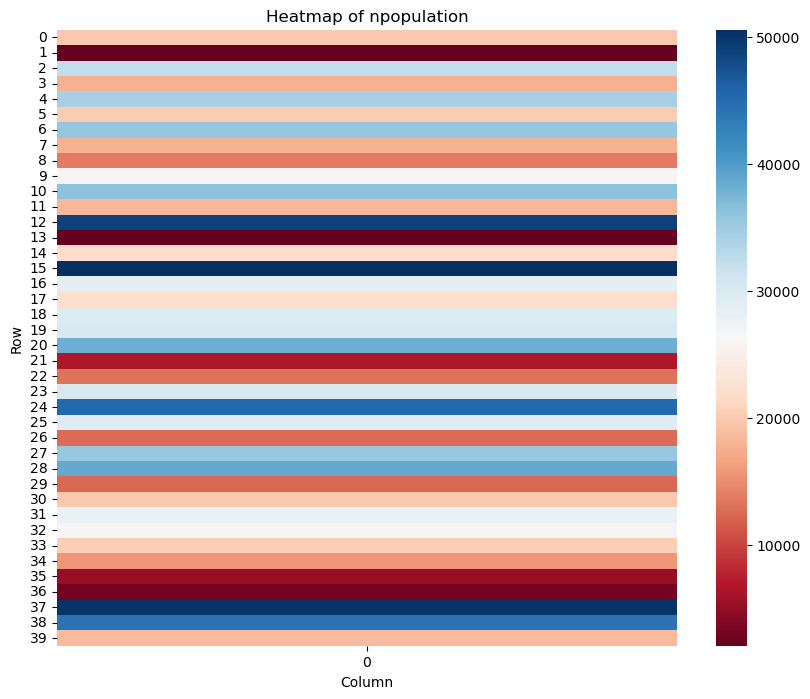

(50, 40, 1)


In [91]:
# 초기 유전 알고리즘 파라미터 설정
population_size = 50
mutation_rate = 0.1
budget = 1000000 #가정

# population 배열 생성
population = np.zeros((population_size, 40, 1))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(40, 1)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol
    
    
# 만들어진 population 출력 (예시로 처음 3개 세대만 출력)
for i in range(3):
    print("Population head", i+1, ":\n", population[i][:5])
    print("Total Sum:", np.sum(population[i]))


import matplotlib.pyplot as plt
import seaborn as sns
npopulation=np.array(population[0], float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(npopulation, cmap='RdBu', vmin=npopulation.min(), vmax=npopulation.max())
plt.title('Heatmap of npopulation')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

print(population.shape)


# 알고즘에서 차원문제 때문에 차원변환 필요

In [96]:
population[0].shape

(40, 1)

In [98]:
weights.shape

(40,)

#유전알고리즘 시작

In [99]:
from tqdm import tqdm  # TQDM 라이브러리 임포트

# 초기 유전 알고리즘 파라미터 설정
population_size = 50
mutation_rate = 0.1
budget = 1000000 #가정
num_generations = 20000

# population 배열 생성
population = np.zeros((population_size, 40, 1))

for i in range(population_size):
    # 전체 합이 예산만큼 크기를 가지도록 매트릭스 생성
    initial_sol = np.random.rand(40, 1)
    total_sum = np.sum(initial_sol)
    initial_sol = initial_sol * budget / total_sum
    population[i] = initial_sol

# 유전 알고리즘

for generation in tqdm(range(num_generations)):
    # 각 염색체의 샤프 지수 계산
    fitness_scores = [sharpe_ratio(weights.reshape(-1), returns, 2019, R_f) for weights in population]

    # 새로운 세대 생성
    new_population = []
    for _ in range(100):
        # 부모 선택 (토너먼트 선택)
        parent1 = random.choice(population)
        parent2 = random.choice(population)

        # 교차 지점 선택
        crossover_point = np.random.randint(0, parent1.shape[0])

        # 부모로부터 자식 생성
        child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]), axis=0)

        # 정규화: 합이 budget이 되도록
        child = child / np.sum(child) * budget

        # 돌연변이
        if random.random() < mutation_rate:
            mutation_point =  np.random.randint(0, parent1.shape[0])
            child[mutation_point] = random.random()
            child /= np.sum(child) * budget  # 정규화



        new_population.append(child)

    population = new_population

# 최적 해 출력
best_solution_index = np.argmax(fitness_scores)
best_solution = population[best_solution_index]
best_sharpe_ratio = fitness_scores[best_solution_index]
print("Optimal Solution head:", best_solution[:5])
print("Optimal Sharpe Ratio:", best_sharpe_ratio)

100%|██████████| 20000/20000 [03:49<00:00, 87.05it/s]

Optimal Solution head: [[7.86315915e-209]
 [7.97185629e-104]
 [8.31909524e-135]
 [1.71975662e-049]
 [1.52817372e-046]]
Optimal Sharpe Ratio: 0.34409023496539


In [100]:
print(np.array(best_solution, float).shape)
print(np.sum(np.array(best_solution, float)))

(40, 1)
1000000.0


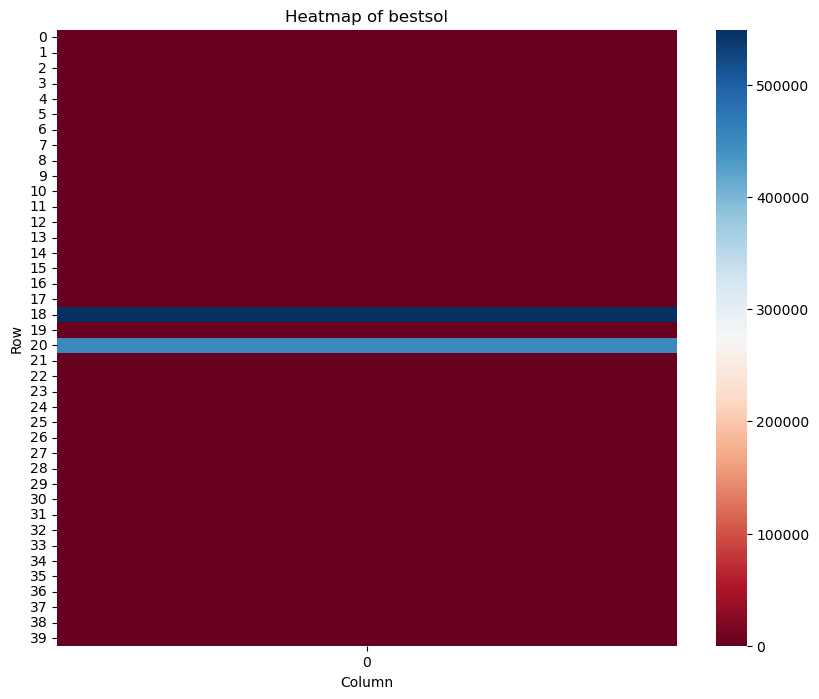

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
bestsol=np.array(best_solution, float)
# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(bestsol, cmap='RdBu', vmin=bestsol.min(), vmax=bestsol.max())
plt.title('Heatmap of bestsol')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()